# Fastai Experimentation

This notebook is intended to be used after running the google image scraper in this repo. To get started follow the README.md in this repo, then come back after all the csv files have been generated, labeled, and saved in the data_csv directory.

In [1]:
from fastai.vision import *
import os
path = Path(f'../../data_csv')

### Define Experiment
Running this cell will save the images and any saved models in a directory with the experiments name.

In [2]:
experiment = 'trees_and_leaves'

In [3]:
dest_path = Path(f'../../data')
img_path = dest_path/experiment

## Verify Images can be Trained

In [4]:
classes = os.listdir(f'../../data/{experiment}')
for c in classes:
    print(c)
#     verify_images(img_path/c, delete=True, max_size=500)

bigleaf_maple
black_hawthorn
Western_flowering_dogwood
exported.pkl
Western_hemlock
models
quaking_aspen
Western_red_cedar
Pacific_madrone
export.pkl
Scouler_willow
Ponderosa_pine
bestmodel.onnx
bitter_cherry
Douglas-fir
red_alder
Pacific_willow
ash_tree
cascara
Oregon_white_oak
black_cottonwood
grand_fir
rigid_willow
Pacific_yew


## Create ImageDataBunch for Training

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(img_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

## Show Classes to be Trained

In [6]:
data.classes

['Douglas-fir',
 'Oregon_white_oak',
 'Pacific_madrone',
 'Pacific_willow',
 'Pacific_yew',
 'Ponderosa_pine',
 'Scouler_willow',
 'Western_flowering_dogwood',
 'Western_hemlock',
 'Western_red_cedar',
 'ash_tree',
 'bigleaf_maple',
 'bitter_cherry',
 'black_cottonwood',
 'black_hawthorn',
 'cascara',
 'grand_fir',
 'quaking_aspen',
 'red_alder',
 'rigid_willow']

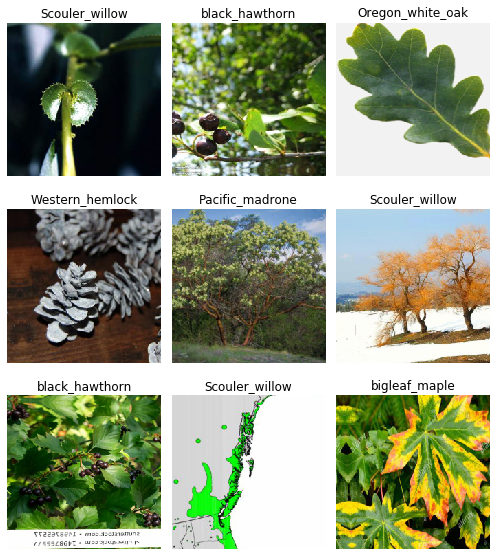

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Douglas-fir',
  'Oregon_white_oak',
  'Pacific_madrone',
  'Pacific_willow',
  'Pacific_yew',
  'Ponderosa_pine',
  'Scouler_willow',
  'Western_flowering_dogwood',
  'Western_hemlock',
  'Western_red_cedar',
  'ash_tree',
  'bigleaf_maple',
  'bitter_cherry',
  'black_cottonwood',
  'black_hawthorn',
  'cascara',
  'grand_fir',
  'quaking_aspen',
  'red_alder',
  'rigid_willow'],
 20,
 2924,
 730)

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy], callback_fns=[
    partial(callbacks.EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=5)])

# Load Best Model, and Export for Production

In [10]:
learn.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (2924 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bigleaf_maple,bigleaf_maple,bigleaf_maple,bigleaf_maple,bigleaf_maple
Path: ../../data/trees_and_leaves;

Valid: LabelList (730 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Scouler_willow,bitter_cherry,black_hawthorn,Pacific_yew,Pacific_willow
Path: ../../data/trees_and_leaves;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(

In [11]:
# learn.export('exported.pkl')

In [59]:
import torch
import torch.nn as nn
import numpy as np
from onnx_coreml import convert
from torch.autograd import Variable
import torch.onnx
import torchvision
import onnx
# def check_onnx_compatible(model, model_name, sz, input_names, output_names):
#     dummy_input = Variable(torch.randn(3, sz, sz)).cuda()

#     torch.onnx.export(model, dummy_input, \
#                       model_name, input_names = input_names, output_names = output_names, verbose=True)
    
    
#     # Check again by onnx
#     # Load the ONNX model
#     onnx_model = onnx.load(model_name)

#     # Check that the IR is well formed
#     onnx.checker.check_model(onnx_model)

#     # Print a human readable representation of the graph
# #     onnx.helper.printable_graph(onnx_model.graph)
#     print("Done")
#     return onnx_model

In [60]:
import torchvision.models as models

In [61]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [230]:
model = learn.model

In [203]:
model = torch.nn.Sequential(model, torch.nn.Softmax(-1))

In [231]:
model.eval()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [232]:
def save_model(model, device, path, name):
    base = path
    onnx_file = base.joinpath('{}.onnx'.format(name)).resolve()
    pth_file = base.joinpath('{}.pth'.format(name)).resolve()
    
    # create dummy variable to traverse graph
    x = torch.randint(255, (1,3,224, 224), dtype=torch.float).to(device) / 255
    torch.onnx.export(model, x, onnx_file)
    print('Saved onnx model to {}'.format(onnx_file))

In [233]:
save_model(model,device,Path('../../data/trees_and_leaves'),'bestmodel')

Saved onnx model to /home/blakedanson/Desktop/repos/dataNotLore/data/trees_and_leaves/bestmodel.onnx


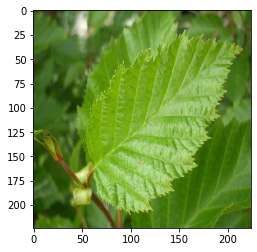

In [183]:
import cv2
import numpy

img = cv2.imread('../../data/trees_and_leaves/red_alder/00000009.jpg', cv2.IMREAD_UNCHANGED)


img = cv2.resize(img, (224, 224))
# plt.imshow(img)
# convert image color to rgb
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
# convert image to numpy
# image = numpy.asarray(img).astype(numpy.float32).reshape(numpy.float32)
# image = numpy.asarray(img_rgb).astype(numpy.float32).reshape(1, 3, 224, 224)
image = np.asarray(img_rgb).astype('float32').reshape(1, 3, 224, 224)
# plt.imshow(image)
# res = sess.run([output_name], {input_name: x})



# DOES NOT WORK... kept around for learnings

In [280]:
from PIL import Image
img = Image.open('../../data/trees_and_leaves/Pacific_yew/00000002.jpg')

In [261]:
doc(learn.predict)

In [281]:
from torchvision import transforms
transform = transforms.Compose([
 transforms.Resize(256),
#  transforms.Resize(224),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(
 mean=[0.485, 0.456, 0.406],
 std=[0.229, 0.224, 0.225]
 )])

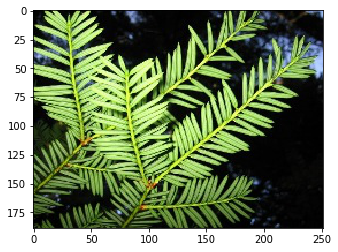

In [282]:
img_t = transform(img)
plt.imshow(img)
image = torch.unsqueeze(img_t, 0)
image = np.asarray(image).astype('float32')

In [229]:
learn.predict(img)

AttributeError: 'JpegImageFile' object has no attribute 'apply_tfms'

In [283]:
import onnxruntime as rt

sess = rt.InferenceSession("../../data/trees_and_leaves/bestmodel.onnx")
input_name = sess.get_inputs()[0].name
r = sess.run(None, {input_name: image})
# print("Shape={0} and predicted labels={1}".format(image.shape, r))
pred_onx = r
print(pred_onx)

[array([[ 1.556488, -4.597526, -1.842785,  0.702003,  8.931   , -1.170334, -0.301445, -5.303041,  3.07016 ,  2.813764,
        -0.874454, -1.194318, -1.727931, -5.729492,  0.858703,  0.1048  ,  4.360074, -4.013945,  1.774867,  0.362356]],
      dtype=float32)]


In [284]:
import onnxruntime as rt

sess = rt.InferenceSession("../../data/trees_and_leaves/bestmodel.onnx")
input_name = sess.get_inputs()[0].name
r = sess.run(None, {input_name: image})
# print("Shape={0} and predicted labels={1}".format(image.shape, r))
pred_onx = r
print(pred_onx[0])

[[ 1.556488 -4.597526 -1.842785  0.702003  8.931    -1.170334 -0.301445 -5.303041  3.07016   2.813764 -0.874454
  -1.194318 -1.727931 -5.729492  0.858703  0.1048    4.360074 -4.013945  1.774867  0.362356]]


In [285]:
import onnxruntime as rt

sess = rt.InferenceSession("../../data/trees_and_leaves/bestmodel.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
pred = sess.run([], {input_name: image})
print(pred)

[array([[ 1.556488, -4.597526, -1.842785,  0.702003,  8.931   , -1.170334, -0.301445, -5.303041,  3.07016 ,  2.813764,
        -0.874454, -1.194318, -1.727931, -5.729492,  0.858703,  0.1048  ,  4.360074, -4.013945,  1.774867,  0.362356]],
      dtype=float32)]


In [286]:
labels = data.classes
print(labels)

['Douglas-fir', 'Oregon_white_oak', 'Pacific_madrone', 'Pacific_willow', 'Pacific_yew', 'Ponderosa_pine', 'Scouler_willow', 'Western_flowering_dogwood', 'Western_hemlock', 'Western_red_cedar', 'ash_tree', 'bigleaf_maple', 'bitter_cherry', 'black_cottonwood', 'black_hawthorn', 'cascara', 'grand_fir', 'quaking_aspen', 'red_alder', 'rigid_willow']


In [287]:
label = labels[numpy.argmax(pred_onx)]
print(label)

Pacific_yew


In [288]:
max_activation = numpy.argmax(pred_onx)
print(max_activation)

4


In [289]:
numpy.argmax(softmax(pred_onx[0]))

4

In [290]:
%%time
sess = rt.InferenceSession("../../data/trees_and_leaves/bestmodel.onnx")
# input_name = sess.get_inputs()[0].name
r = sess.run(None, {input_name: image})
# print("Shape={0} and predicted labels={1}".format(image.shape, r))
pred_onx = r[0]
print(pred_onx)

[[ 1.556488 -4.597526 -1.842785  0.702003  8.931    -1.170334 -0.301445 -5.303041  3.07016   2.813764 -0.874454
  -1.194318 -1.727931 -5.729492  0.858703  0.1048    4.360074 -4.013945  1.774867  0.362356]]
CPU times: user 711 ms, sys: 43.1 ms, total: 754 ms
Wall time: 127 ms


In [291]:
softmax(pred_onx[0])

array([[6.159410e-04, 1.308835e-06, 2.057090e-05, 2.620844e-04, 9.823107e-01, 4.029911e-05, 9.608355e-05,
        6.463737e-07, 2.798456e-03, 2.165545e-03, 5.417441e-05, 3.934407e-05, 2.307459e-05, 4.219666e-07,
        3.065457e-04, 1.442378e-04, 1.016531e-02, 2.346016e-06, 7.662670e-04, 1.866097e-04]], dtype=float32)

In [53]:
def softmax(x):
    '''
    Numpy Softmax, via comments on https://gist.github.com/stober/1946926
    >>> res = softmax(np.array([0, 200, 10]))
    >>> np.sum(res)
    1.0
    >>> np.all(np.abs(res - np.array([0, 1, 0])) < 0.0001)
    True
    >>> res = softmax(np.array([[0, 200, 10], [0, 10, 200], [200, 0, 10]]))
    >>> np.sum(res, axis=1)
    array([ 1.,  1.,  1.])
    >>> res = softmax(np.array([[0, 200, 10], [0, 10, 200]]))
    >>> np.sum(res, axis=1)
    array([ 1.,  1.])
    '''
    if x.ndim == 1:
        x = x.reshape((1, -1))
    max_x = np.max(x, axis=1).reshape((-1, 1))
    exp_x = np.exp(x - max_x)
    return exp_x / np.sum(exp_x, axis=1).reshape((-1, 1))

In [292]:
print(list(map(lambda num: round(num,3),softmax(pred_onx[0])[0])))

[0.001, 0.0, 0.0, 0.0, 0.982, 0.0, 0.0, 0.0, 0.003, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.001, 0.0]
